faut-il mieux utiliser commer unité documentaire un bulletin ou bien un article?
=> je dirai plus unité documentaire = bulletin 
parceque chercher la fréquence d'apparition d'un mot dans le titre d'une image par exemple, ne veut pas dire grande chose.
De plus, plus tard, on s'intéressera à chercher des bulletins par rapport à des mots spécéfiques et non pas des textes, ou juste une seule image.



In [ ]:
import pandas as pd

def calculate_coeff(input_file, output_file):
    """Calcule le nombre d'occurrences des mots dans chaque document et l'enregistre dans un fichier CSV"""
    df = pd.read_csv(input_file, sep= "\t")

    # nb d'occurrences des mots par document
    counts = df.groupby(["mot", "doc_id"]).size().reset_index(name="tf") 

    counts.to_csv(output_file, sep='\t', index=False, encoding="utf-8")




In [ ]:
calculate_coeff(
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/dict_complet.csv",
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/tf.csv"
)

In [ ]:
import pandas as pd
import numpy as np

def calculate_idf(input_file, output_file):
    """Calcule les coefficients IDF pour chaque mot et les enregistre dans un fichier TSV."""

    df = pd.read_csv(input_file, sep='\t')
    N = df["doc_id"].nunique() #nb de documents
    print(N)


    dft = df.groupby("mot")["doc_id"].nunique().reset_index(name="dft")  # Nombre de docs par mot
    #print(dft)

   
    dft["idft"] = np.log10(N / dft["dft"])
    dft[["mot", "idft"]].to_csv(output_file, sep='\t', index=False, encoding="utf-8")



In [ ]:
calculate_idf(
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/occurences.csv",
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/idf_coefficients.csv"
)

In [ ]:
import pandas as pd

def final_calculation(tf, idf, output):
    # Charger les fichiers CSV
    tf_data = pd.read_csv(tf, sep="\t")
    idf_data = pd.read_csv(idf, sep="\t")
    # Fusionner les deux fichiers sur la colonne "mot"
    final_df = tf_data.merge(idf_data, on="mot", how="inner")  # 'inner' pour éviter les NaN

    final_df["tf*idf"] = final_df["tf"] * final_df["idft"]
    final_df[["doc_id", "mot", "tf*idf"]].to_csv(output, sep='\t', index=False, encoding="utf-8")



In [10]:
final_calculation(
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/tf.csv",
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/idf_coefficients.csv",
    "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/output.csv"
)

Colonnes tf_data: Index(['mot', 'doc_id', 'tf'], dtype='object')
Colonnes idf_data: Index(['mot', 'idft'], dtype='object')
Valeurs NaN après merge:
 mot       0
doc_id    0
tf        0
idft      0
dtype: int64


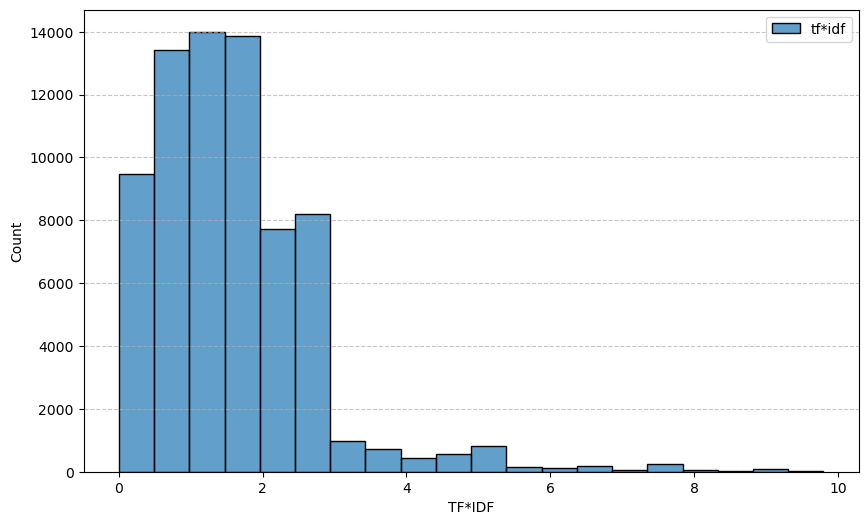

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_tf_idf_histogram(tf_idf_file, bins=20):
    df = pd.read_csv(tf_idf_file, sep='\t')
    data = df[df["tf*idf"]<=10]
    plt.figure(figsize=(10, 6))
    #plt.hist(df["tf*idf"], bins=bins, edgecolor='black', alpha=0.7)
    sns.histplot(data, bins=bins, alpha=0.7)
    # Add labels and title
    plt.xlabel("TF*IDF")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


plot_tf_idf_histogram("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/output.csv")


In [1]:
import pandas as pd
final_data= pd.read_csv("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/output.csv", sep='\t')
sorted_data = final_data.sort_values("tf*idf")
print(sorted_data)
sorted_data.to_csv("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/sorted_data.csv", sep='\t', index=False, encoding="utf-8")


      doc_id         mot     tf*idf
25943  67392          et   0.002673
26151  73189          et   0.002673
26077  70921          et   0.002673
26115  72121          et   0.005345
26075  70919          et   0.005345
...      ...         ...        ...
49986  70421     pompier  27.645394
49719  71836    pléiades  30.158611
30625  67937    hoffmann  32.671829
63995  69184  sérotonine  35.185046
11210  71357      cheval  39.819377

[71556 rows x 3 columns]


In [2]:
def extract_first_quantile(file_path, output_path, qt1=0.1):
    df = pd.read_csv(file_path, sep="\t")

    # Compute Q1 (first quartile)
    q1 = df["tf*idf"].quantile(qt1)

    # Select words in the first quartile
    first_quartile_df = df[df["tf*idf"] <= q1]

    # Save the filtered results
    first_quartile_df.to_csv(output_path, sep="\t", index=False, encoding="utf-8")
    print(f"Q{qt1} Value: {q1}")



In [11]:
extract_first_quantile("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/data/sorted_data.csv", 
                       "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/data/q=0.17.csv", 
                       0.17)

Q0.17 Value: 0.6211310122699408


In [ ]:
#après avoir visualiser les différents mots appartenant aux valeurs de quantiles différentes  0.15 / 0.2 /0.25
#j'ai décidé de prendre 0.15 comme seuil max. Cette valeur permet d'enlever que des mots parasytes, 
# sans riquer enlever des mots qui peuvent étre utiles.
#Mais, on aurait pu prendre 0.2 pour étre plus agressif et enlever un maximum de mots, 
# meme si on risque de perdre quelques mots parfois qui peuvent étre utiles
cut_off_value = 0.17

In [9]:
def extract_last_quartile(file_path, output_path, qt2=0.9):
    df = pd.read_csv(file_path, sep="\t")

    # Compute the last quantile
    qt = df["tf*idf"].quantile(qt2)

    last_quartile_df = df[df["tf*idf"] >= qt]

    last_quartile_df.to_csv(output_path, sep="\t", index=False, encoding="utf-8")

    print(f"Last quartile extracted and saved to {output_path}")
    print(f"Q{qt2} Value: {qt}")


In [10]:
extract_last_quartile("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/data/sorted_data.csv", 
                       "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/data/lq=0.9.csv", 
                       0.9)

Last quartile extracted and saved to C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/data/lq=0.9.csv
Q0.9 Value: 2.513217600067939


Je n'ai pas réussi à trouver une valeur seuil min. C'est facil de trouver le seuil maximum parcequ'on voir clairement quels mots sont utiles, et quels mots ne le sont pas.
Mais, pour le seuil min, c'est bcp moins évident

In [26]:
def create_anti_dict(file_path, output_path):
    df = pd.read_csv(file_path, sep="\t")
    q1 = df["tf*idf"].quantile(0.17)

    # Select words in the first quartile and those with tf*idf >= 10
    to_remove = df[df["tf*idf"] <= q1]
    to_remove = pd.concat([to_remove, df[df["tf*idf"] >= 10]])

    # Keep only unique words
    to_remove = to_remove["mot"].drop_duplicates().to_frame()

    # Save the filtered results
    to_remove.to_csv(output_path, sep="\t", index=False, encoding="utf-8", header=True)


In [27]:
create_anti_dict("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/data/sorted_data.csv", 
                       "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/anti_dict.csv")

In [56]:
#Prepare substitution CSV (unwanted words → "")
words_to_remove = pd.read_csv("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/anti_dict.csv")
words_to_remove[1] = " "  # Set replacement to empty string
words_to_remove.to_csv("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/anti_dict2.csv", sep="\t", index=False, header=True)

In [3]:
import string
def nettoyer_texte(texte: str) -> str:
    """
    Nettoie un texte en enlevant la ponctuation et en mettant tous les caractères en minuscules.

    :param texte: Le texte à nettoyer.
    :return: Le texte nettoyé sans ponctuation et en minuscules.
    """
    ponctuation = string.punctuation
    for p in ponctuation:
        texte = texte.replace(p, "")
    return texte.lower() 

def segmente(fichier, output):
    with open(output, "a", encoding="utf-8") as f_w:
        f_w.write("mot" + "\t" + "doc_id\n")
        with open(fichier, "r", encoding="utf-8") as f:
            doc_id = 0
            for ligne in f.readlines():
                if "<fichier>" in ligne:
                    doc_id = ligne[9:14]
                if "<texte>" in ligne:
                    texte = str(ligne)
                    texte = texte.replace("<texte>", "")
                    texte = texte.replace("</texte>", "")
                    texte_propre = nettoyer_texte(texte)
                    mots = texte_propre.split()
                    #print(mots)
                    for mot in mots:
                        to_write = mot + "\t" + doc_id + "\n"
                        f_w.write(to_write)


In [6]:
def substitue(texte, replacables, output):
    df = pd.read_csv(replacables, sep="\t")
    with open(output, "a", encoding="utf-8") as f_w:
        with open(texte, "r", encoding="utf-8") as f_r:
            for ligne in f_r.readlines():
                mots = ligne.split()
                for mot in mots:
                    match = df[df.iloc[:, 0] == mot]  # Filter by first column
                    if not match.empty:
                        f_w.write(str(match.iloc[0, 1])+" ")
                    else:
                        f_w.write(mot + " ")
                f_w.write("\n")


In [8]:
import pandas as pd
substitue("C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD2/corpus.XML",
          "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/anti_dict2.csv",
            "C:/Users/ntich/OneDrive/Desktop/school shit/LO17/TD3/corpus_nettoyé2.XML")